In [852]:
#import libraries
import pandas as pd
import numpy as np
import spacy
import langid
import langdetect
import nltk
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score



from nltk.tokenize import sent_tokenize, word_tokenize




In [853]:
#import stopwords and data
from nltk.corpus import stopwords


import matplotlib.pyplot as plt
from nltk.classify.textcat import TextCat
data = pd.read_csv("https://d3972zdc1g7j5a.cloudfront.net/uploads/DataScienceTask/questions.csv")
data['Question'].dropna(inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 7 columns):
Category      368 non-null float64
Question      368 non-null object
Unnamed: 2    0 non-null float64
Unnamed: 3    0 non-null float64
Unnamed: 4    0 non-null float64
Unnamed: 5    0 non-null float64
Unnamed: 6    0 non-null float64
dtypes: float64(6), object(1)
memory usage: 49.6+ KB


In [854]:
# Drop Unnamed2,3,4,5 and 6
data = data[['Question','Category']].copy()

In [855]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 2 columns):
Question    368 non-null object
Category    368 non-null float64
dtypes: float64(1), object(1)
memory usage: 15.6+ KB


In [856]:
# Add new Hindi stopwords
sr = stopwords.words('english')
sr.append('के')
sr.append('का')
sr.append('एक')
sr.append('में')
sr.append('की')
sr.append('है')
sr.append('यह')
sr.append('और')
sr.append('से')
sr.append('हैं')
sr.append('को')
sr.append('पर')
sr.append('इस')
sr.append('होता')
sr.append('कि')
sr.append('जो')
sr.append('कर')
sr.append('मे')
sr.append('गया')
sr.append('करने')
sr.append('किया')
sr.append('लिये')
sr.append('अपने')
sr.append('ने')
sr.append('बनी')
sr.append('नहीं')
sr.append('तो')
sr.append('ही')
sr.append('या')
sr.append('एवं')
sr.append('दिया')
sr.append('हो')
sr.append('इसका')
sr.append('था')
sr.append('द्वारा')
sr.append('हुआ')
sr.append('तक')
sr.append('साथ')
sr.append('करना')
sr.append('वाले')
sr.append('बाद')
sr.append('लिए')
sr.append('आप')
sr.append('कुछ')
sr.append('सकते')
sr.append('किसी')
sr.append('ये')
sr.append('इसके')
sr.append('सबसे')
sr.append('इसमें')
sr.append('थे')
sr.append('दो')
sr.append('होने')
sr.append('वह')
sr.append('वे')
sr.append('करते')
sr.append('बहुत')
sr.append('कहा')
sr.append('वर्ग')
sr.append('कई')
sr.append('करें')
sr.append('होती')
sr.append('अपनी')
sr.append('उनके')
sr.append('थी')
sr.append('यदि')
sr.append('हुई')
sr.append('जा')
sr.append('ना')
sr.append('इसे')
sr.append('कहते')
sr.append('जब')
sr.append('होते')
sr.append('कोई')
sr.append('हुए')
sr.append('व')
sr.append('न')
sr.append('अभी')
sr.append('जैसे')
sr.append('सभी')
sr.append('करता')
sr.append('उनकी')
sr.append('तरह')
sr.append('उस')
sr.append('आदि')
sr.append('कुल')
sr.append('एस')
sr.append('रहा')
sr.append('इसकी')
sr.append('सकता')
sr.append('रहे')
sr.append('उनका')
sr.append('इसी')
sr.append('रखें')
sr.append('अपना')
sr.append('पे')
sr.append('उसके')


In [857]:
print("Percent of data in Hindi (estimated):")
print((sum(langs=="hi")/len(langs))*100)



Percent of data in Hindi (estimated):
89.94565217391305


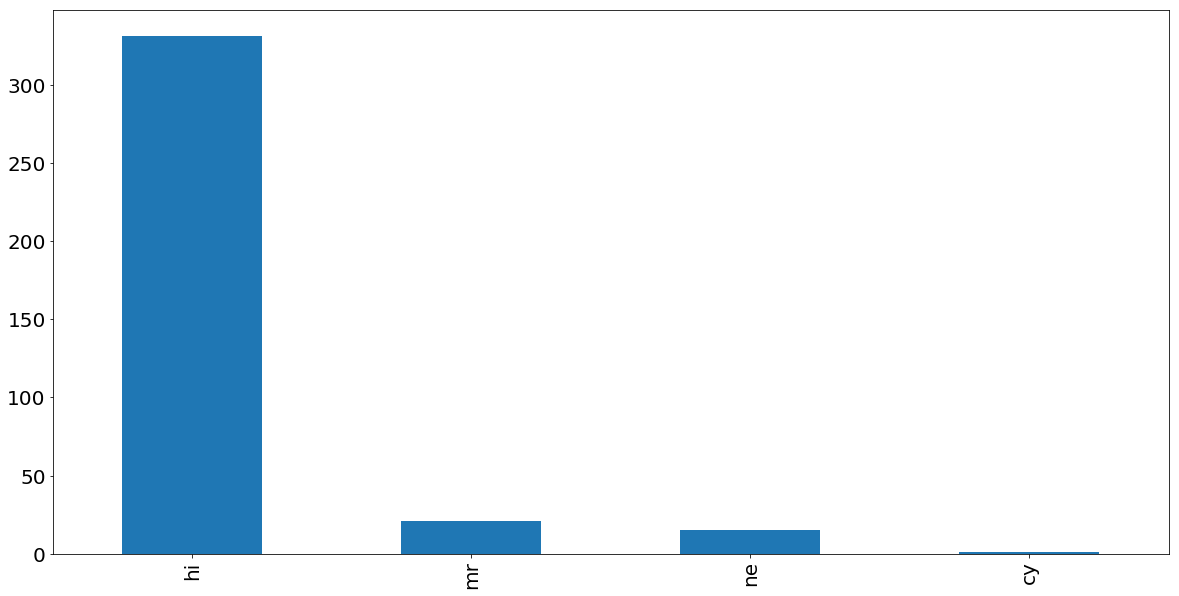

In [858]:
langs_df = pd.DataFrame(langs)

# count the number of times we see each language
langs_count = langs_df.Question.value_counts()

# plot of count of different languages
langs_count.plot.bar(figsize=(20,10), fontsize=20)
plt.show()


In [859]:

print(data['Question'].iloc[0:5])

0    क्या बीजेपी को प्रियंका की टक्कर में वरुण गांध...
1        Narander modi ji ka speech aapko ksa lgta h ?
2    क्या ममता बनर्जी को धरने में बैठने से कोई फायद...
3         भारत की राजनीति में सबसे घटिया आदमी कौन है ?
4    अरविंद केजरीवाल को प्रधानमंत्री मोदी इतने बुरे...
Name: Question, dtype: object


In [860]:
data.shape

(996, 2)

In [861]:
#remove null rows
data = data.dropna()

In [862]:
data.shape

(368, 2)

In [863]:
# preprocessing data ie tokenizing, removing stopwords and stemming
words = []

data['finalnew'] = ''
def preprocessing(Question,stem=True,stop_words=True):
    index = 0
    for i in Question:
        
        #print(Question[i])
        word1 = word_tokenize(i)
        if stop_words:
            word1 = [word for word in word1 if word not in sr]
        if stem:
            stemmer = PorterStemmer()
            word1 = [stemmer.stem(word) for word in word1]
        words.append(word1)
        
        data['finalnew'][index] =str(words[index])
        print(words[index])
        
        index+=1
        
    #print(words)    
    return words

In [864]:
P = []
Final_text = [text for text in data['Question']]

P = preprocessing(Final_text,True,True)

c:\python\python36\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['क्या', 'बीजेपी', 'प्रियंका', 'टक्कर', 'वरुण', 'गांधी', 'खड़ा', 'चाहिए', 'क्यों', '?']
['narand', 'modi', 'ji', 'ka', 'speech', 'aapko', 'ksa', 'lgta', 'h', '?']
['क्या', 'ममता', 'बनर्जी', 'धरने', 'बैठने', 'फायदा', 'प्राप्त', 'होगा']
['भारत', 'राजनीति', 'घटिया', 'आदमी', 'कौन', '?']
['अरविंद', 'केजरीवाल', 'प्रधानमंत्री', 'मोदी', 'इतने', 'बुरे', 'क्यों', 'लगते', '?']
['पीएम', 'मोदी', 'राफेल', 'सौदे', 'जुड़े', 'विपक्ष', 'सवालों', 'जवाब', 'क्यों', 'दे', '?']
['सपा', 'बसपा', 'गठबंधन', 'कॉन्ग्रेस', 'भी', 'शामिल', 'जाए', 'क्या', 'भाजपा', 'कमजोर', 'पड़', 'जाएगी', '?', 'आपको', 'क्या', 'लगता', '?']
['हिंदू-मुसलमान', 'विवाद', 'देश', 'किस', 'प्रकार', 'हानि', '?']
['कौन', 'सा', 'भाषा', 'सब', 'ज्यादा', 'देशों', 'बोला', 'जाता', '?', '?']
['गौरव', 'जी', 'बताइए', 'बीजेपी', 'पार्टी', 'क्यों', 'ज्वाइन', 'करी', '?']
['भारत', 'राजधानी', 'दिल्ली', 'पूर्ण', 'राज्य', 'दर्जा', 'मिलना', 'चाहिए', 'जवाब', 'प्रकट', '?', '?']
['हमारे', 'भारत', 'जवान', 'शहीद', 'गए', 'लोग', 'राय', 'दें', 'हमें', 'उन', 'लोगों', 'मुका

['कौन', 'तारिक', 'अनवर', 'जिसने', 'एनसीपी', 'टाटा', 'बाय', 'बाय', 'बोल', 'कांग्रेस', 'ज्वाइन', 'लिया', '?']
['सरदार', 'वल्लभ', 'भाई', 'पटेल', 'आरएसएस', 'क्यों', 'बैन', 'बावजूद', 'उन्हें', 'बीजेपी', 'इतनी', 'तवज्जो', 'क्यों', 'दे', 'रही', '?']
['क्या', 'मोदी', 'सरकार', 'भारत', 'संवैधानिक', 'संस्थाओं', 'ठेस', 'पहुंचाने', 'कोशिश', 'रही', '?']
['बिहार', 'भारतीय', 'जनता', 'पार्टी', 'नीतीश', 'अन्य', 'सहयोगी', 'दलों', 'गठबंधन', 'बारे', 'क्या', 'कहना', 'आपका', '?']
['2019', 'लोकसभा', 'चुनाव', 'कांग्रेस', 'महाराष्ट्र', 'कौन', 'कौन', 'सी', 'पार्टी', 'गठबंधन', 'करेगी', '?']
['राहुल', 'गांधी', 'जनेऊ', 'धारी', 'बीजेपी', 'इतनी', 'दिक्कत', 'क्यों', 'रही', '?']
['आपके', 'हिसाब', 'बिहार', 'नेता', 'उपेंद्र', 'कुशवाहा', 'राजनीति', 'कितनी', 'अहमियत', '?']
['अंबाती', 'रायडू', 'फॉर्म', 'आ', 'जाने', 'क्या', 'भारत', 'मिडिल', 'ऑर्डर', 'अब', 'स्ट्रांग', 'जाएगा', '?']
['मेरठ', 'हाशिमपुरा', 'इलाके', 'ऐसा', 'क्या', 'जिसके', 'चलते', 'दिल्ली', 'हाईकोर्ट', 'पीएसी', '16', 'जवानों', 'उम्र', 'कैद', 'सजा', 'सुना', 'दी', 

['बीजेपी', 'उन', 'मौजूदा', 'सांसदों', 'नाम', 'बताइए', 'जिन्हें', 'आपको', 'लगता', 'उम्र', 'स्वास्थ्य', 'वजह', '2019', 'लोकसभा', 'इलेक्शन', 'लड़', 'पाएंगे', '?']
['कितने', 'प्रतिशत', 'लोग', 'मानते', 'मोदी', 'जी', 'दोबारा', 'प्रधानमंत्री', 'बनेंगे', '?']
['बुदनी', 'जीतेगा', '?']
['मध्यप्रदेश', '2019', 'किसकी', 'सरकार', 'बनेगी', '?']
['आज', 'समय', 'किस', 'राजनीति', '?']
['क्या', 'राष्ट्रपति', 'कांग्रेस', 'अनुमोदन', 'बिना', 'अल', 'कायदा', 'खिलाफ', 'सैन्य', 'बल', 'अधिकृत', 'सके', '?']
['क्या', 'आपको', 'कम्युनिस्ट', 'विचारधारा', 'अच्छी', 'लगती', 'अगर', 'लगती', 'क्या', 'क्या', 'कारण', '?']
['क्या', 'लगता', 'मध्य', 'प्रदेश', 'कौन', 'सरकार', 'बनेगी', '?']
['अबकी', 'बार', 'राजस्थान', 'कौन', 'सी', 'सरकार', 'बनेगी', 'भाजपा', '?']
['भाइयो', 'मुझे', 'बताइये', 'कौन', 'कौन', 'प्रदेश', 'भाजपा', 'सरकार', 'बनेगी']
['राजस्थान', 'किसकी', 'सरकार', 'बनेगी', '?']
['शिवराज', 'सिंह', 'चौहान', 'व्यक्तित्व', 'बारे', 'राय', 'दीजिए', '?']
['मध्यप्रदेश', 'मुख्यमंत्री', 'कोन', 'बनेगा', '?', '?']
['हमारे', 'पंतप्रधान',

['राजस्थान', 'किसकी', 'सरकार', '...', 'A', 'कांग्रेस', 'bभाजपा']
['हमारा', 'नेता', 'कैसा', '?']
['राष्ट्रीय', 'लोकतांत्रिक', 'संस्था', 'क्या', '?']
['क्या', 'बजरंग', 'बली', 'राजनीति', 'सही', '?']
['राजस्थान', 'किसकी', 'सरकार', 'बनेगी']
['राहुल', 'गांधी', 'पप्पू', 'नाम', 'किसने', 'रखा', '?']
['क्या', 'राजस्थान', 'वसुंधरा', 'राज्य', 'सरकार', 'बना', 'पाएगी', '?']
['क्या', 'देश', 'प्रधानमंत्री', 'राहुल', 'गांधी', 'बनना', 'चाहिए', '?']
['राजस्थान', 'अब', 'बार', 'किसकी', 'सरकार', 'बनेगी']
['मध्यप्रदेश', 'किसकी', 'बनेगी', 'सरकार', '?']
['अगले', 'लोकसभा', 'चुनाव', 'बीजेपी', 'कितनी', 'सीट', 'आएगी']
['आदर्श', 'नगर', 'विधानसभा', 'क्षेत्र', 'अगला', 'विधायक', 'कौन', 'होगा', '?']
['मध्यप्रदेश', 'छतीसगढ़', 'राजस्थान', 'कौन', 'चुनाव', 'जीत', '?', '?', '?', '?']
['2019', 'चुनाव', 'भारत', 'मुख्यमंत्री', 'कौन', 'बनेगा']
['राष्ट्रीय', 'लोकतांत्रिक', 'पार्टी', 'किसने', 'बनाई']
['क्या', 'चुनाव', 'आयोग', 'ओपिनियन', 'पोल', 'प्रतिबंध', 'लगा', 'देना', 'चाहिए', 'क्यों', '?']
['कांग्रेश', 'राज', 'आंतकवादी', 'ताज'

In [865]:
data['finalnew']

0      ['क्या', 'बीजेपी', 'प्रियंका', 'टक्कर', 'वरुण'...
1      ['narand', 'modi', 'ji', 'ka', 'speech', 'aapk...
2      ['क्या', 'ममता', 'बनर्जी', 'धरने', 'बैठने', 'फ...
3       ['भारत', 'राजनीति', 'घटिया', 'आदमी', 'कौन', '?']
4      ['अरविंद', 'केजरीवाल', 'प्रधानमंत्री', 'मोदी',...
5      ['पीएम', 'मोदी', 'राफेल', 'सौदे', 'जुड़े', 'वि...
6      ['सपा', 'बसपा', 'गठबंधन', 'कॉन्ग्रेस', 'भी', '...
7      ['हिंदू-मुसलमान', 'विवाद', 'देश', 'किस', 'प्रक...
8      ['कौन', 'सा', 'भाषा', 'सब', 'ज्यादा', 'देशों',...
9      ['गौरव', 'जी', 'बताइए', 'बीजेपी', 'पार्टी', 'क...
10     ['भारत', 'राजधानी', 'दिल्ली', 'पूर्ण', 'राज्य'...
11     ['हमारे', 'भारत', 'जवान', 'शहीद', 'गए', 'लोग',...
12     ['अधिकांशतः', 'भ्रष्ट', 'नेता', 'इंडिया', 'क्य...
13     ['जम्मू', 'कश्मीर', 'पुलवामा', 'आतंकी', 'हमले'...
14     ['आपके', 'अनुसार', 'भारतीय', 'राजनीति', 'किस',...
15     ['कश्मीर', 'लोग', 'पाकिस्तान', 'देते', 'अब', '...
16     ['भारत', 'पाकिस्तान', 'चहिते', 'उनको', 'सरकार'...
17     ['100', '90', 'प्रतिशत',

In [828]:
#data=data.drop([367],axis=0)

In [866]:
# Model Selection
from sklearn import model_selection, naive_bayes, svm

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data['finalnew'],data['Category'],test_size=0.25)

In [867]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['finalnew'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [868]:
# Vectorize Training and Test data
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [869]:
print(Tfidf_vect.vocabulary_)

{'टक': 218, 'कर': 164, 'वर': 404, 'खड': 176, 'narand': 38, 'modi': 37, 'ji': 30, 'ka': 31, 'speech': 44, 'aapko': 23, 'ksa': 34, 'lgta': 35, 'ममत': 331, 'बनर': 303, 'धरन': 251, 'ठन': 225, 'यद': 343, 'रत': 370, 'जन': 205, 'घट': 190, 'आदम': 85, 'अरव': 65, 'जर': 212, 'रध': 373, 'नम': 261, 'इतन': 106, 'लगत': 385, 'एम': 140, 'पक': 274, 'सव': 452, 'जव': 214, 'सप': 435, 'बसप': 310, 'गठब': 183, 'धन': 248, 'जप': 209, 'कमज': 162, 'पड': 277, 'एग': 135, 'आपक': 89, 'सलम': 451, 'रक': 356, 'सब': 438, 'रव': 379, 'बत': 296, 'इए': 100, 'इन': 107, 'जध': 204, 'दर': 244, 'लन': 389, 'रकट': 357, 'हम': 462, 'शह': 420, 'गए': 181, 'उन': 122, 'बल': 308, 'अध': 53, 'शत': 411, 'रष': 380, 'जम': 210, 'कश': 172, 'लव': 395, 'आत': 83, 'हमल': 463, 'बर': 306, 'कह': 174, 'सर': 447, 'कल': 170, 'इक': 101, 'अन': 54, 'बड': 294, 'आवश': 98, 'यकत': 340, 'अब': 58, 'चह': 198, 'उनक': 123, 'सरक': 448, 'सज': 430, 'नह': 272, '100': 0, '90': 22, 'कव': 171, 'आजकल': 82, 'उसम': 130, 'रम': 378, 'जग': 202, 'रद': 372, 'षण': 422, 'नत': 259, 'ज

In [870]:
# fit the training dataset on the NB classifier

Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [871]:
# predict the labels on validation dataset

predictions_NB = Naive.predict(Test_X_Tfidf)


In [872]:
# Use accuracy_score function to get the accuracy

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  86.95652173913044


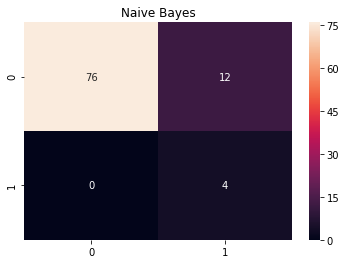

In [873]:
# Confusion matrix for Naive Bayes

from sklearn import metrics
Naive_Bayes_conf_matrix       = metrics.confusion_matrix(predictions_NB, Test_Y)
sns.heatmap(Naive_Bayes_conf_matrix, annot=True,  fmt='');
title = 'Naive Bayes'
plt.title(title);

In [874]:
# Classification report for Naive Bayes

print('Naive Bayes Classifier:\n {}\n'.format(metrics.classification_report(predictions_NB,Test_Y)))


Naive Bayes Classifier:
               precision    recall  f1-score   support

         2.0       1.00      0.86      0.93        88
         3.0       0.25      1.00      0.40         4

   micro avg       0.87      0.87      0.87        92
   macro avg       0.62      0.93      0.66        92
weighted avg       0.97      0.87      0.90        92




In [875]:
# fit the training dataset on the classifier

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset

predictions_SVM = SVM.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy

print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  85.86956521739131


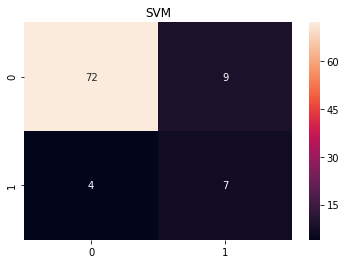

In [876]:
# Confusion matrix for SVM
from sklearn import metrics
svm_svc_conf_matrix       = metrics.confusion_matrix(predictions_SVM, Test_Y)
sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
title = 'SVM'
plt.title(title);

In [877]:
# Classification Report for SVM

print('SVM Classifier:\n {}\n'.format(metrics.classification_report(predictions_SVM,Test_Y)))


SVM Classifier:
               precision    recall  f1-score   support

         2.0       0.95      0.89      0.92        81
         3.0       0.44      0.64      0.52        11

   micro avg       0.86      0.86      0.86        92
   macro avg       0.69      0.76      0.72        92
weighted avg       0.89      0.86      0.87        92


